### Homework 1 Python Data Analysis and Machine Learning
楊英豪 ntust_B10803207

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('Data.csv')
data.head()

c:\Users\Reinaldo yang\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3433: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
data.shape
data.info()
df = data.copy()
df['host_identity_verified'].value_counts(dropna= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

unconfirmed    51200
verified       51110
Name: host_identity_verified, dtype: int64

In [7]:
df.info()

df['neighbourhood group'].value_counts(dropna = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [8]:
df['room type'].value_counts(dropna = True)

Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room type, dtype: int64

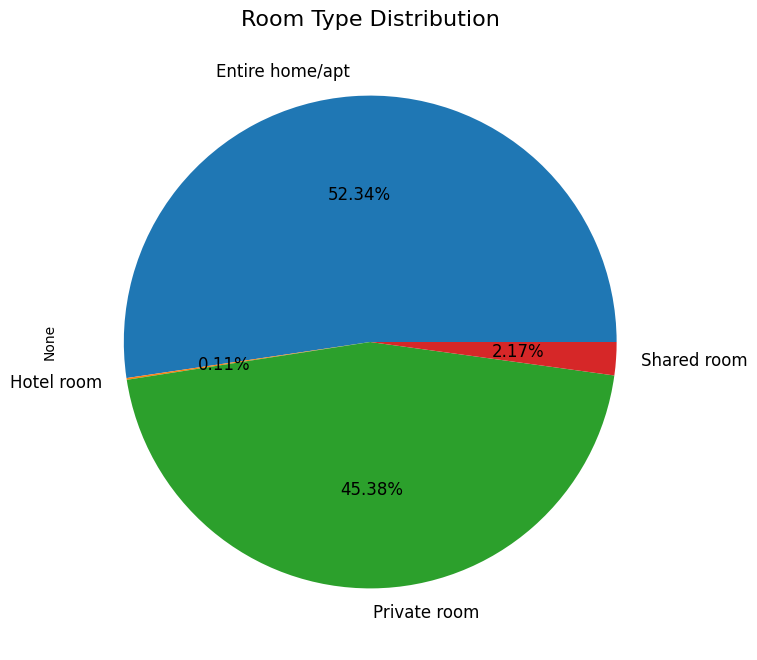

In [20]:
#group the data by room type and number of occurences
room_counts = df.groupby('room type', dropna = True).size()

room_counts.plot.pie(figsize = (8,8), autopct= '%.2f%%', fontsize = 12)

plt.title('Room Type Distribution', fontsize= 16)

plt.show()

In [46]:
df.info()

#remove dollar sign
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')
df['price'] = df['price'].astype(float)

most_expensive = df.nlargest(10, 'price')
print(most_expensive[['NAME', 'price']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

C:\Users\Reinaldo yang\AppData\Local\Temp\ipykernel_6384\413707523.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '')


In [78]:
df['last review'] = pd.to_datetime(df['last review'], format='%m/%d/%Y')
df.dropna(subset=['last review'], inplace=True)
df = df.sort_values(by='last review', ascending=False)
latest_review = df.iloc[0]
airbnb_name = latest_review['NAME']
host_id = latest_review['host id']
last_review_date = latest_review['last review']
print(host_id)
print(airbnb_name)
print(last_review_date)

87944779917
Beautiful Landmarked Duplex
2058-06-16 00:00:00
